### Topic: Challenge Set 7  
### Subject: Classification  
### Date: 10/22/2018  
### Name: Maddy O'Brien Jones  
### Worked: alone  

**Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.

### Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [95]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [96]:
votes = pd.read_csv('house-votes-84.data')

In [97]:
votes = votes.replace('y',1)
votes = votes.replace('n',0)
votes = votes.replace('?', np.nan)
for each in votes.columns[:-1]:
    votes[each].fillna(votes[each].mean(),inplace=True)
votes = votes.replace('democrat.', 'democrat')
votes = votes.replace('republican.', 'republican')

In [98]:
votes['republican.'].value_counts()

democrat      267
republican    167
Name: republican., dtype: int64

### Challenge 2

Split the data into a test and training set. Use this function:

from sklearn.cross_validation import train_test_split

In [99]:
target = votes['republican.']
features = votes.loc[:,'n':'y.8']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=4444)

### Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

from sklearn.neighbors import KNeighborsClassifier
Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

from sklearn.metrics import accuracy_score
Which k value gives the highest accuracy?

In [100]:
knn_list = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_list.append((i,accuracy_score(y_test,y_pred)))

knn_list

[(1, 0.9083969465648855),
 (2, 0.9083969465648855),
 (3, 0.9083969465648855),
 (4, 0.916030534351145),
 (5, 0.9236641221374046),
 (6, 0.9083969465648855),
 (7, 0.916030534351145),
 (8, 0.916030534351145),
 (9, 0.9236641221374046),
 (10, 0.9083969465648855),
 (11, 0.9236641221374046),
 (12, 0.9312977099236641),
 (13, 0.9312977099236641),
 (14, 0.916030534351145),
 (15, 0.916030534351145),
 (16, 0.916030534351145),
 (17, 0.916030534351145),
 (18, 0.9083969465648855),
 (19, 0.916030534351145),
 (20, 0.9007633587786259)]

The K values 12 and 13 all give the same answer. For simplicity, I am choosing 12 as the ideal value.

### Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [101]:
lr = LogisticRegression(C=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9541984732824428

### Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

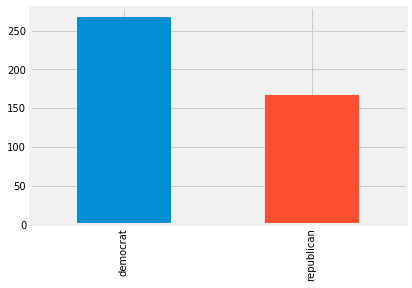

In [102]:
votes['republican.'].value_counts().plot('bar')

In [103]:
def democrat(x):
    return np.array(['democrat' for i in range(len(x))])

accuracy_score(y_test,democrat(X_test))

0.6030534351145038

In [104]:
def republican(x):
    return np.array(['republican' for i in range(len(x))])

accuracy_score(y_test,republican(X_test))

0.3969465648854962

### Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

Text(0,0.5,'Accuracy')

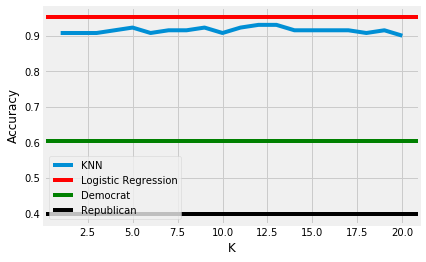

In [105]:
krange = []
kaccuracy = []

for each in knn_list:
    kr, ka = each
    krange.append(kr)
    kaccuracy.append(ka)


plt.plot(krange,kaccuracy)
plt.axhline(accuracy_score(y_test,lr.predict(X_test)), color='r')
plt.axhline(accuracy_score(y_test,democrat(X_test)), color='g')
plt.axhline(accuracy_score(y_test,republican(X_test)), color='k')
plt.legend(['KNN', 'Logistic Regression', 'Democrat', 'Republican'])
plt.xlabel('K')
plt.ylabel('Accuracy')

### Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

from sklearn.learning_curve import learning_curve   

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)  
test_cv_err = np.mean(ts_err, axis=1)  

Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).
  
Draw the learning curve for KNN with the best k value as well.

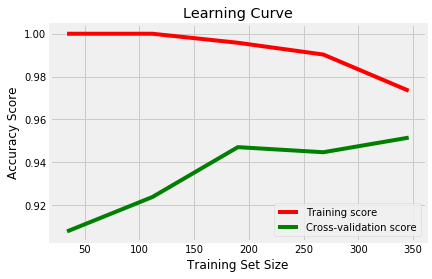

In [106]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, test_scores = learning_curve(lr, features, target, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.show()

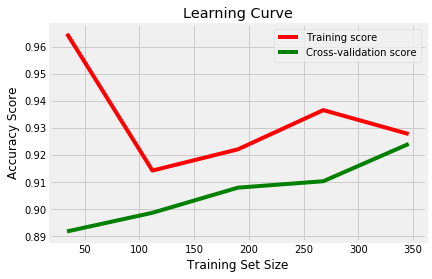

In [107]:
train_sizes, train_scores, test_scores = learning_curve(knn, features, target, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.show()

### Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:  
Gaussian Naive Bayes  
SVM (Support Vector Machine) Classifier  
Decision Tree  
Random Forest  

In [108]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9083969465648855

In [109]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9541984732824428

In [110]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9236641221374046

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.916030534351145

### Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

from sklearn.cross_validation import cross_val_score
Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [112]:
from sklearn.cross_validation import cross_val_score

classifiers = [KNeighborsClassifier(12), lr, gb, svc, dtc, rf]

scores = []
for each in classifiers:
    crossval = cross_val_score(each, features, target)
    scores.append((each, 'Cross-Val Score: ' + str(crossval.mean())))
scores

[(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=12, p=2,
             weights='uniform'), 'Cross-Val Score: 0.9262611749680715'),
 (LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  'Cross-Val Score: 0.9607758620689655'),
 (GaussianNB(priors=None), 'Cross-Val Score: 0.9308429118773947'),
 (SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'Cross-Val Score: 0.9538793103448276'),
 (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None

### Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [113]:
votes = pd.read_csv('house-votes-84.data')
votes = votes.replace('y',1)
votes = votes.replace('n',0)
votes = votes.replace('?', np.nan)
for each in votes.columns[:-1]:
    votes[each].fillna(votes[each].mode()[0],inplace=True)

In [114]:
target = votes['n']
features = votes.loc[:,'y':'y.8']

In [117]:
knn_list = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_list.append((i,cross_val_score(knn, features, target).mean()))
knn_list

[(1, 0.57328132927448),
 (2, 0.621765601217656),
 (3, 0.6196727549467276),
 (4, 0.6426623541349569),
 (5, 0.6219875697615423),
 (6, 0.6589294774226281),
 (7, 0.6473236935565704),
 (8, 0.6635591070522576),
 (9, 0.6726598173515982),
 (10, 0.6657787924911213),
 (11, 0.6471968543886352),
 (12, 0.656519533231862),
 (13, 0.6540778792491121),
 (14, 0.6610540334855403),
 (15, 0.6679350583460173),
 (16, 0.6518581938102487),
 (17, 0.64951166920345),
 (18, 0.6541095890410958),
 (19, 0.6541095890410958),
 (20, 0.6541095890410958)]

### Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [151]:
movies = pd.read_csv('2013_movies.csv')
movies = movies.dropna()
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


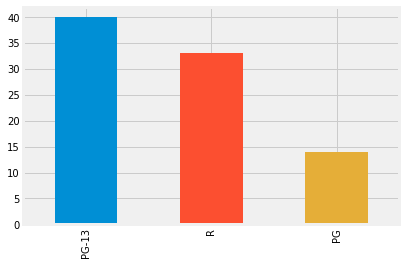

In [152]:
features = movies.loc[:,['Budget','DomesticTotalGross','Runtime']]
target = movies['Rating']
target.value_counts().plot('bar')

In [163]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=4444)

knn_list = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_list.append((i,cross_val_score(knn, features, target).mean()))
knn_list

[(1, 0.426464148877942),
 (2, 0.3804597701149426),
 (3, 0.39157088122605366),
 (4, 0.414176245210728),
 (5, 0.36814449917898195),
 (6, 0.42525998905309254),
 (7, 0.379255610290093),
 (8, 0.4022441160372195),
 (9, 0.4018609742747674),
 (10, 0.41335522714833056),
 (11, 0.41335522714833056),
 (12, 0.44745484400656815),
 (13, 0.4363437328954571),
 (14, 0.4363437328954571),
 (15, 0.4248494800218938),
 (16, 0.4363437328954571),
 (17, 0.4367542419266557),
 (18, 0.4367542419266557),
 (19, 0.4367542419266557),
 (20, 0.4248494800218938)]

In [169]:
lr = LogisticRegression(C=1000)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.4444444444444444

In [170]:
def stupid(x):
    return np.array(['PG-13' for i in range(len(x))])

accuracy_score(y_test, stupid(X_test))

0.4074074074074074

The stupid predictor does about the same or slightly worse than K-nearest neighbors, and a little worse compared to the logistic regression.

In [172]:
lr.coef_

array([[-1.46124379e-08, -1.93897623e-09, -1.75965536e-13],
       [ 1.49848414e-08, -6.42667083e-09, -9.13751595e-14],
       [-2.30763200e-08,  5.12598612e-09,  1.16458130e-13]])

This shows the coefficients for each of the one vs. all equations for each possible outcome. It appears that budget is most important when predicting outcome (positive affect for R rated movies, negative for others), followed by gross (positive effect for PG, negative for others), then runtime for each of them (positive effect for PG, negative for others). 

### Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

What is the average and standard deviation of the age of all of the patients?  
What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?  
What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?  
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.    
What is the earliest year of surgery in this dataset?  
What is the most recent year of surgery?  
Use logistic regression to predict survival after 5 years. How well does your model do?  
What are the coefficients of logistic regression? Which features affect the outcome how?  
Draw the learning curve for logistic regression in this case.  

In [176]:
'''
1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

'''

hsd = pd.read_csv('haberman.data')
hsd.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [177]:
hsd['30'].mean()

52.5311475409836

In [178]:
hsd['30'].std()

10.744024363993269

In [179]:
hsd[hsd['1.1']==1]['30'].mean()

52.11607142857143

In [180]:
hsd[hsd['1.1']==1]['30'].std()

10.93744589077857

In [181]:
hsd[hsd['1.1']==2]['30'].mean()

53.67901234567901

In [182]:
hsd[hsd['1.1']==2]['30'].std()

10.16713720829741

Text(0.5,1,'Number of Nodes')

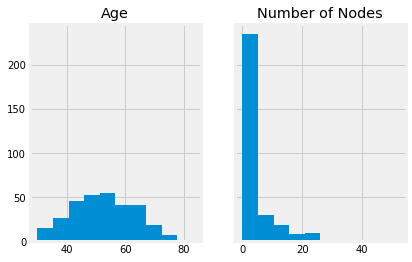

In [196]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(hsd['30'])
ax1.set_title('Age')
ax2.hist(hsd['1'])
ax2.set_title('Number of Nodes')


In [186]:
1900 + hsd['64'].min()

1958

In [189]:
1900 + hsd['64'].max()

1969

In [190]:
target = hsd['1.1']
features = hsd.loc[:,'30':'1']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=4444)

lr = LogisticRegression(C=1000)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.75

In [192]:
lr.coef_

array([[0.00891349, 0.03432614, 0.08077232]])

Number of nodes is most important, followed by year of operation, then age. For each, the coefficients are positive, strangely.

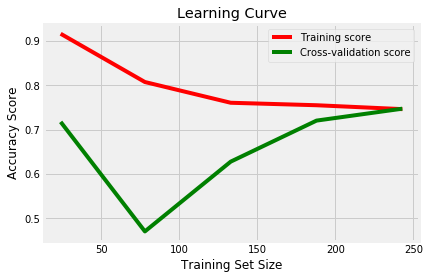

In [193]:
train_sizes, train_scores, test_scores = learning_curve(lr, features, target, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.show()